In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset('NotShrirang/email-spam-filter')
df = pd.DataFrame(dataset['train'])

print("Dataset Overview:")
df.info()
#print("\nFirst few rows of the dataset:")
df.head()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


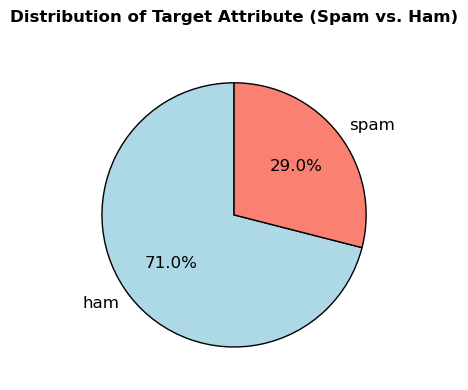

In [3]:
plt.figure(figsize=(4, 4))  

df['label'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=["lightblue", "salmon"], 
    startangle=90, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  
    textprops={'fontsize': 12}  
)
plt.title("Distribution of Target Attribute (Spam vs. Ham)", fontsize=12, fontweight='bold', pad=20)
plt.ylabel("")
plt.tight_layout()
plt.show()

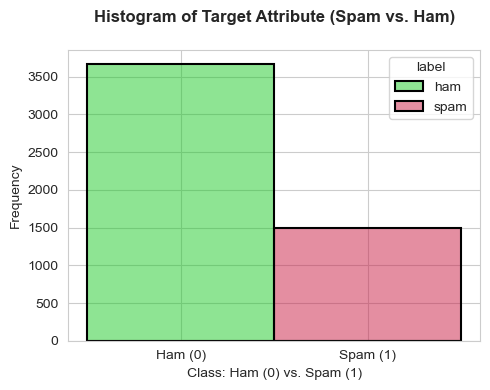

In [4]:
sns.set_style("whitegrid")

plt.figure(figsize=(5, 4))
sns.histplot(
    data=df, 
    x='label_num', 
    bins=2, 
    kde=False, 
    hue='label', 
    palette={'ham': '#1eca28', 'spam': '#ca1e45'},  
    edgecolor='black', 
    linewidth=1.5
)

plt.title("Histogram of Target Attribute (Spam vs. Ham)", fontsize=12, fontweight='bold', pad=20)
plt.xlabel("Class: Ham (0) vs. Spam (1)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks([0.25, 0.75], labels=['Ham (0)', 'Spam (1)'], fontsize=10)  

plt.tight_layout()
plt.show()

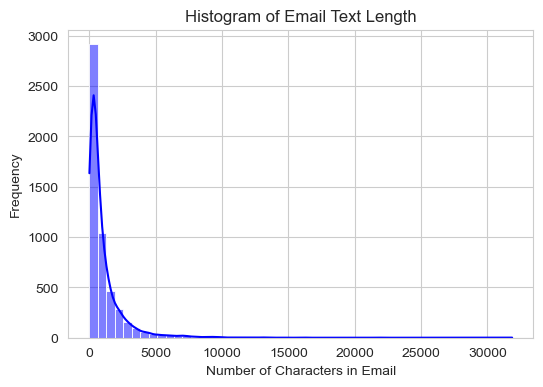


Text Length Summary:
count     5171.00000
mean      1029.74531
std       1505.10317
min         10.00000
25%        238.00000
50%        529.00000
75%       1214.00000
max      31860.00000
Name: text_length, dtype: float64

Missing values per column:
Unnamed: 0     0
label          0
text           0
label_num      0
text_length    0
dtype: int64


In [5]:
df['text_length'] = df['text'].apply(len)  

plt.figure(figsize=(6, 4))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title("Histogram of Email Text Length")
plt.xlabel("Number of Characters in Email")
plt.ylabel("Frequency")
plt.show()

print("\nText Length Summary:")
print(df['text_length'].describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())